<a href="https://colab.research.google.com/github/SyedAoun95/seat-detection-computer-vision-/blob/main/emptychair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from ultralytics import YOLO
import os

# =========================
# Configuration
# =========================
drive_path = '/content/drive/MyDrive/seat detetction'         # Your main Drive path
model_name = 'yolov8l_custom3_'                      # Folder where last.pt is saved
epochs_to_train = 50                               # Total epochs to train
resume_training = False                             # Enable resume from last.pt

# =========================
# Full path to last.pt checkpoint
# =========================
last_checkpoint_path = f'/content/drive/MyDrive/yolo/runs/detect/yolov8l_custom3_retrain/weights/last.pt'

# =========================
# Load model (resume or fresh)
# =========================
if resume_training and os.path.exists('/content/drive/MyDrive/yolo/runs/detect/yolov8l_custom3_retrain/weights/last.pt'):
    print(f"✅ Resuming training from: {'/content/drive/MyDrive/yolo/runs/detect/yolov8l_custom3_retrain/weights/last.pt'}")
    model = YOLO(last_checkpoint_path)
else:
    print("⚠️ last.pt not found or resume disabled — starting from scratch.")
    model = YOLO('yolov8l.yaml')  # Start fresh with YOLOv8 large config

# =========================
# Train the model
# =========================
try:
    model.train(
        data=f'/content/drive/MyDrive/seat detetction/data.yaml',             # Path to your dataset YAML
        epochs=epochs_to_train,                     # Total epochs to train (YOLOv8 handles resuming automatically)
        imgsz=640,                                  # Input image size
        batch=16,                                   # Batch size
        workers=2,                                  # Number of data loader workers
        name=model_name,                            # Folder name to store results
        pretrained=False,                           # Do not use COCO pretrained weights
        project=f'/content/drive/MyDrive/seat detetction',        # Base directory for output
        resume=resume_training                      # Tells YOLO to resume from checkpoint
    )
except KeyboardInterrupt:
    print("⏹️ Training manually interrupted.")


⚠️ last.pt not found or resume disabled — starting from scratch.
Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/seat detetction/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8l_custom3_3, nbs=64, nms=False, opset=None, optimize=False, 

train: Scanning /content/drive/MyDrive/seat detetction/labels/train... 0 images, 3427 backgrounds, 0 corrupt: 100%|██████████| 3427/3427 [00:44<00:00, 76.83it/s] 

WARNING ⚠️ train: No labels found in /content/drive/MyDrive/seat detetction/labels/train.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


WARNING ⚠️ train: Cache directory /content/drive/MyDrive/seat detetction/labels is not writeable, cache not saved.
WARNING ⚠️ No labels found in /content/drive/MyDrive/seat detetction/labels/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 5.0±9.1 ms, read: 13.5±9.0 MB/s, size: 43.2 KB)


val: Scanning /content/drive/MyDrive/seat detetction/labels/valid... 0 images, 675 backgrounds, 0 corrupt: 100%|██████████| 675/675 [00:06<00:00, 107.10it/s]

WARNING ⚠️ val: No labels found in /content/drive/MyDrive/seat detetction/labels/valid.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


WARNING ⚠️ val: Cache directory /content/drive/MyDrive/seat detetction/labels is not writeable, cache not saved.
WARNING ⚠️ No labels found in /content/drive/MyDrive/seat detetction/labels/valid.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
Plotting labels to /content/drive/MyDrive/seat detetction/yolov8l_custom3_3/labels.jpg... 
WARNING ⚠️ zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/seat detetction/yolov8l_custom3_3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances

       1/50        11G          0      147.1          0          0        640:   5%|▍         | 10/215 [00:09<03:24,  1.00it/s]

⏹️ Training manually interrupted.


In [ ]:
import os

label_dir = "/content/drive/MyDrive/seat detetction/lables/train"
missing_or_empty = [f for f in os.listdir(label_dir) if os.path.getsize(os.path.join(label_dir, f)) == 0]

print(f"Total label files: {len(os.listdir(label_dir))}")
print(f"Empty label files: {len(missing_or_empty)}")


Total label files: 3428
Empty label files: 1


In [ ]:
import os

label_dir = "/content/drive/MyDrive/seat detetction/lables/train"
empty_files = [f for f in os.listdir(label_dir) if os.path.getsize(os.path.join(label_dir, f)) == 0]
print("Empty file path:", empty_files[0])


Empty file path: 10-242-_jpg.rf.241bec5375a9e8ad35df7b6166a9ebec.txt


In [ ]:
from pathlib import Path

img_dir = Path("/content/drive/MyDrive/seat detetction/images/train")
lbl_dir = Path("/content/drive/MyDrive/seat detetction/lables/train")

img_files = list(img_dir.glob("*.jpg"))
missing_labels = [f for f in img_files if not (lbl_dir / f.with_suffix('.txt').name).exists()]

print(f"Total images: {len(img_files)}")
print(f"Images with missing labels: {len(missing_labels)}")

Total images: 3443
Images with missing labels: 16


In [ ]:
from pathlib import Path

img_dir = Path("/content/drive/MyDrive/seat detetction/images/train")
lbl_dir = Path("/content/drive/MyDrive/seat detetction/lables/train")

img_files = list(img_dir.glob("*.jpg"))

missing_labels = [f for f in img_files if not (lbl_dir / f.with_suffix('.txt').name).exists()]

# Confirm what will be deleted
print("Images to delete (missing labels):")
for f in missing_labels:
    print(f)

# Delete them
for f in missing_labels:
    f.unlink()

print(f"\n✅ Deleted {len(missing_labels)} images with missing labels.")


Images to delete (missing labels):
/content/drive/MyDrive/seat detetction/images/train/10-242-_jpg.rf.241bec5375a9e8ad35df7b6166a9ebec.jpg
/content/drive/MyDrive/seat detetction/images/train/10-6-_jpg.rf.38ac04822b9ec7b058500d8fc74716f3 (1).jpg
/content/drive/MyDrive/seat detetction/images/train/10-61-_jpg.rf.28e01220bcff96639578fcf7f321fde9 (1).jpg
/content/drive/MyDrive/seat detetction/images/train/10-6-_jpg.rf.001a6e3472e99c0080e1c26541c65976 (1).jpg
/content/drive/MyDrive/seat detetction/images/train/10-6-_jpg.rf.9e2210e92bc99c26e8d345477060f68a (1).jpg
/content/drive/MyDrive/seat detetction/images/train/10-61-_jpg.rf.b626efe1ece602880ce8dce739510ae7 (1).jpg
/content/drive/MyDrive/seat detetction/images/train/10-61-_jpg.rf.39da0a97ba04d87567cc700d2847118c (1).jpg
/content/drive/MyDrive/seat detetction/images/train/10-61-_jpg.rf.8b8438bb987ad3600345ae23252267b6 (1).jpg
/content/drive/MyDrive/seat detetction/images/train/10-6-_jpg.rf.33d5ac332497d2f03fe59b061994b7b1 (1).jpg
/content/

In [ ]:
from pathlib import Path

label_dir = Path("/content/drive/MyDrive/seat detetction/lables/train")
empty_or_bad = []

for f in label_dir.glob("*.txt"):
    with open(f) as file:
        lines = file.readlines()
        if not lines or not all(len(line.split()) == 5 for line in lines):
            empty_or_bad.append(f.name)

print(f"Bad label files: {len(empty_or_bad)}")
print(empty_or_bad)
for f in empty_or_bad:
    (label_dir / f).unlink()


Bad label files: 7
['10-213-_jpg.rf.91c5e74fe6e72fb9bf72d9ca5d31c63a.txt', '10-321-_jpg.rf.5c59ce07d5ecf30e81c2cc56e1b07e2d.txt', '10-28-_jpg.rf.6a7cd680e67b1e464927cac2727fd09e.txt', '10-467-_jpg.rf.80327940bca3971d3bc3d3310cc0af20.txt', 'IMG_3543-min_jpeg.rf.7b1993ad4e12d882008898ce5b9efb99.txt', 'IMG_3815_jpeg.rf.2c5843da7a12a1ffe3a4244e2a87777a.txt', 'Chair-251-_jpg.rf.64d28e15d283317d46a5dbcb47b66e09.txt']


In [ ]:
from pathlib import Path

label_dir = Path("/content/drive/MyDrive/seat detetction/lables/train")
empty_or_bad = []

for f in label_dir.glob("*.txt"):
    with open(f) as file:
        lines = file.readlines()
        if not lines or not all(len(line.split()) == 5 for line in lines):
            empty_or_bad.append(f)

# Delete the bad label files
for bad_file in empty_or_bad:
    print(f"Deleting: {bad_file}")
    bad_file.unlink()


In [ ]:
from ultralytics import YOLO
import os

# =========================
# Configuration
# =========================
drive_path = '/content/drive/MyDrive/seat detetction'         # Your main Drive path
model_name = 'yolov8l_custom3_'                      # Folder where last.pt is saved
epochs_to_train = 50                               # Total epochs to train
resume_training = True                             # Enable resume from last.pt

# =========================
# Full path to last.pt checkpoint
# =========================
last_checkpoint_path = f'/content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/last.pt'

# =========================
# Load model (resume or fresh)
# =========================
if resume_training and os.path.exists('/content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/last.pt'):
    print(f"✅ Resuming training from: {'/content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/last.pt'}")
    model = YOLO(last_checkpoint_path)
else:
    print("⚠️ last.pt not found or resume disabled — starting from scratch.")
    model = YOLO('yolov8l.yaml')  # Start fresh with YOLOv8 large config

# =========================
# Train the model
# =========================
try:
    model.train(
        data=f'/content/drive/MyDrive/seat detetction/data.yaml',             # Path to your dataset YAML
        epochs=epochs_to_train,                     # Total epochs to train (YOLOv8 handles resuming automatically)
        imgsz=640,                                  # Input image size
        batch=16,                                   # Batch size
        workers=2,                                  # Number of data loader workers
        name=model_name,                            # Folder name to store results
        pretrained=False,                           # Do not use COCO pretrained weights
        project=f'/content/drive/MyDrive/seat detetction',        # Base directory for output
        resume=resume_training                      # Tells YOLO to resume from checkpoint
    )
except KeyboardInterrupt:
    print("⏹️ Training manually interrupted.")


✅ Resuming training from: /content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/last.pt
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/seat detetction/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/last.pt, momentum=0.937, mosaic=1

train: Scanning /content/drive/MyDrive/seat detetction/labels/train.cache... 3420 images, 7 backgrounds, 0 corrupt: 100%|██████████| 3427/3427 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.9±2.5 ms, read: 4.9±5.0 MB/s, size: 43.2 KB)


val: Scanning /content/drive/MyDrive/seat detetction/labels/valid.cache... 675 images, 0 backgrounds, 0 corrupt: 100%|██████████| 675/675 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/seat detetction/yolov8l_custom3_5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Resuming training /content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/last.pt from epoch 47 to 50 total epochs
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/seat detetction/yolov8l_custom3_5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.53G     0.8937     0.6681      1.346          6        640: 100%|██████████| 215/215 [39:32<00:00, 11.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        675       1644      0.889      0.882      0.917      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.71G     0.8434     0.6087      1.307         18        640: 100%|██████████| 215/215 [02:58<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:14<00:00,  1.49it/s]

                   all        675       1644      0.898      0.874      0.923      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.73G     0.8214     0.6021      1.295         10        640: 100%|██████████| 215/215 [03:00<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:14<00:00,  1.50it/s]

                   all        675       1644      0.908      0.877      0.925      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.58G     0.8205     0.5859      1.295          6        640: 100%|██████████| 215/215 [03:01<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:15<00:00,  1.41it/s]

                   all        675       1644      0.889      0.891      0.924      0.606



4 epochs completed in 0.839 hours.
Optimizer stripped from /content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/last.pt, 87.6MB
Optimizer stripped from /content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/best.pt, 87.6MB

Validating /content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:19<00:00,  1.16it/s]


                   all        675       1644       0.89       0.89      0.924      0.606
            emptychair        453        903      0.896      0.901      0.939      0.638
             fullchair        315        741      0.883      0.879      0.909      0.574
Speed: 0.3ms preprocess, 16.9ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/drive/MyDrive/seat detetction/yolov8l_custom3_5


In [ ]:
from ultralytics import YOLO

# 1. Load your best checkpoint
model = YOLO('/content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/best.pt')

# 2. Run validation with plotting enabled
#    - data: path to your data.yaml
#    - imgsz, batch: should match training settings (optional)
#    - split='val' to validate on the validation set
#    - plots=True tells YOLO to generate and save the confusion matrix
results = model.val(
    data   = '/content/drive/MyDrive/seat detetction/data.yaml',
    imgsz  = 640,
    batch  = 16,
    split  = 'val',
    conf   = 0.001,
    iou    = 0.5,
    plots  = True
)

# 3. Print out the raw confusion matrix array
print("Confusion matrix (rows=GT, cols=Pred):")
print(results.confusion_matrix)

# 4. (Optional) If you want to display the plotted confusion matrix in-script:
results.plot_confusion_matrix()  # this will open the matplotlib figure


Ultralytics 8.3.130 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8l summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 42.9±68.2 MB/s, size: 298.8 KB)


val: Scanning /content/drive/MyDrive/seat detetction/labels/valid.cache... 675 images, 0 backgrounds, 0 corrupt: 100%|██████████| 675/675 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [42:49<00:00, 59.77s/it]


                   all        675       1644      0.911      0.891       0.92      0.602
            emptychair        453        903      0.929      0.902      0.938      0.633
             fullchair        315        741      0.892      0.881      0.902      0.572
Speed: 5.6ms preprocess, 3769.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val2
Confusion matrix (rows=GT, cols=Pred):


AttributeError: 'DetMetrics' object has no attribute 'plot_confusion_matrix'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP).

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class.
        names (dict): A dictionary of class names.
        box (Metric): An instance of the Metric class for storing detection results.
        speed (dict): A dictionary for storing execution times of different parts of the detection process.
        task (str): The task type, set to 'detect'.
    

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("E:/coding source VS/find/model/best (1).pt")

# Run inference on a single image
results = model.predict(
    source="E:/coding source VS/find/test_images/chair1.jpg",  # path to your test image
    imgsz=640,         # inference resolution
    conf=0.45,         # confidence threshold
    save=True,         # save annotated image to runs/predict/exp
    save_txt=False     # do not save YOLO txt labels
)

# Print out detected classes and bounding boxes
for r in results:  # there will be only one Results object for your single image
    print("Detected classes:", [model.names[int(c)] for c in r.boxes.cls.cpu().numpy()])
    print("Bounding boxes (xyxy):", r.boxes.xyxy.cpu().numpy())


In [ ]:
from ultralytics import YOLO
import os

# =========================
# Configuration
# =========================
drive_path = '/content/drive/MyDrive/seat detetction'         # Your main Drive path
model_name = 'yolov8l_custom3_'                      # Folder where last.pt is saved
epochs_to_train = 50                               # Total epochs to train
resume_training = False                            # Enable resume from last.pt

# =========================
# Full path to last.pt checkpoint
# =========================
last_checkpoint_path = f'/content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/last.pt'

# =========================
# Load model (resume or fresh)
# =========================
if resume_training and os.path.exists('/content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/last.pt'):
    print(f"✅ Resuming training from: {'/content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/last.pt'}")
    model = YOLO(last_checkpoint_path)
else:
    print("⚠️ last.pt not found or resume disabled — starting from scratch.")
    model = YOLO('yolov8l.yaml')  # Start fresh with YOLOv8 large config

# =========================
# Train the model
# =========================
try:
    model.train(
        data=f'/content/drive/MyDrive/seat detetction/data.yaml',             # Path to your dataset YAML
        epochs=epochs_to_train,                     # Total epochs to train (YOLOv8 handles resuming automatically)
        imgsz=640,                                  # Input image size
        batch=16,                                   # Batch size
        workers=2,                                  # Number of data loader workers
        name=model_name,                            # Folder name to store results
        pretrained=False,                           # Do not use COCO pretrained weights
        project=f'/content/drive/MyDrive/seat detetction',        # Base directory for output
        resume=resume_training                      # Tells YOLO to resume from checkpoint
    )
except KeyboardInterrupt:
    print("⏹️ Training manually interrupted.")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
⚠️ last.pt not found or resume disabled — starting from scratch.
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/seat detetction/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_

In [ ]:
from ultralytics import YOLO
import os

# =========================
# Configuration
# =========================
drive_path = '/content/drive/MyDrive/seat detetction'         # Your main Drive path
model_name = 'yolov8l_custom3_2n'                     # Folder where best/last.pt is saved
additional_epochs = 50                                # Additional epochs you want to train
weights_path = f'/content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/best.pt'  # Or use 'best.pt' if preferred

# =========================
# Load model from last checkpoint (not resume mode)
# =========================
if os.path.exists(weights_path):
    print(f"/content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/best.pt")
    model = YOLO(weights_path)
else:
    print("❌ Checkpoint not found — please verify the path.")
    raise FileNotFoundError(f"/content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/best.pt")

# =========================
# Start new training from existing weights
# =========================
try:
    model.train(
        data=f'/content/drive/MyDrive/seat detetction/data.yaml',              # Path to your dataset YAML
        epochs=additional_epochs,                    # Number of *additional* epochs
        imgsz=416,                                    # Input image size
        batch=4,                                      # Batch size
        workers=2,                                    # Number of data loader workers
        name='yolov8l_custom_continue',               # New folder for continued training results
        pretrained=False,                             # Already using your trained weights

        amp=True,
        project='/content/drive/MyDrive/yolo 3',
        resume=False,                                 # ✅ KEY FIX: do NOT resume — just use weights
        close_mosaic=5
    )
except KeyboardInterrupt:
    print("⏹️ Training manually interrupted.")


/content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/best.pt
Ultralytics 8.3.137 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=5, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/seat detetction/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/seat detetction/yolov8l_custom3_5/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=

train: Scanning /content/drive/MyDrive/seat detetction/labels/train.cache... 3420 images, 7 backgrounds, 0 corrupt: 100%|██████████| 3427/3427 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.5±2.3 ms, read: 2.9±2.8 MB/s, size: 43.2 KB)


val: Scanning /content/drive/MyDrive/seat detetction/labels/valid.cache... 675 images, 0 backgrounds, 0 corrupt: 100%|██████████| 675/675 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolo 3/yolov8l_custom_continue2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo 3/yolov8l_custom_continue2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.21G      1.001     0.7968      1.342          4        416: 100%|██████████| 857/857 [18:24<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.94it/s]

                   all        675       1644      0.867      0.814      0.891      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.48G       1.04     0.8321      1.354         20        416: 100%|██████████| 857/857 [02:12<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.02it/s]

                   all        675       1644      0.828      0.807      0.861      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.7G      1.064     0.8589      1.376         11        416: 100%|██████████| 857/857 [02:13<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.81it/s]

                   all        675       1644      0.839      0.801      0.874      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.7G       1.07      0.857      1.375         14        416: 100%|██████████| 857/857 [02:14<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.01it/s]

                   all        675       1644      0.868      0.825      0.865      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.76G      1.076     0.8532      1.381         10        416: 100%|██████████| 857/857 [02:14<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:11<00:00,  7.70it/s]

                   all        675       1644      0.896      0.829      0.899      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         3G      1.044     0.8228      1.364          7        416: 100%|██████████| 857/857 [02:15<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.85it/s]

                   all        675       1644      0.863       0.83      0.883      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.21G      1.021     0.7969      1.352          7        416: 100%|██████████| 857/857 [02:14<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.16it/s]

                   all        675       1644      0.877      0.817      0.878      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.21G      1.008      0.809       1.34          8        416: 100%|██████████| 857/857 [02:13<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.19it/s]


                   all        675       1644      0.906      0.845      0.904      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.21G      1.012     0.7917      1.338          8        416: 100%|██████████| 857/857 [02:15<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.75it/s]

                   all        675       1644       0.89      0.827      0.886       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.21G     0.9837     0.7492      1.313          5        416: 100%|██████████| 857/857 [02:15<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.86it/s]

                   all        675       1644      0.879      0.839      0.896      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.21G     0.9856     0.7515      1.326         15        416: 100%|██████████| 857/857 [02:16<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.02it/s]


                   all        675       1644      0.898      0.846      0.905      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.21G      0.954     0.7335      1.302          6        416: 100%|██████████| 857/857 [02:20<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.23it/s]

                   all        675       1644      0.892      0.861      0.907      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.21G     0.9563      0.728      1.306          8        416: 100%|██████████| 857/857 [02:14<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.16it/s]

                   all        675       1644      0.916      0.832      0.906      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.21G     0.9597     0.7023      1.306         13        416: 100%|██████████| 857/857 [02:19<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.40it/s]

                   all        675       1644      0.894      0.858      0.904      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.21G     0.9379     0.7055      1.293         12        416: 100%|██████████| 857/857 [02:14<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:09<00:00,  8.50it/s]

                   all        675       1644      0.906      0.846      0.906      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.21G     0.9462     0.7005      1.296          7        416: 100%|██████████| 857/857 [02:13<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.94it/s]

                   all        675       1644      0.889      0.869      0.906      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.21G      0.923     0.6881      1.286         11        416: 100%|██████████| 857/857 [02:13<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.11it/s]

                   all        675       1644      0.907      0.871      0.914      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.21G     0.9358     0.6935      1.294         18        416: 100%|██████████| 857/857 [02:18<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.87it/s]

                   all        675       1644      0.893      0.862      0.907      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.23G     0.8894     0.6692      1.264         11        416: 100%|██████████| 857/857 [02:14<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.18it/s]

                   all        675       1644      0.892      0.854      0.907      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.23G     0.8876      0.646      1.267          4        416: 100%|██████████| 857/857 [02:13<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.17it/s]

                   all        675       1644      0.902      0.868      0.913      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.23G     0.8738     0.6475      1.252         17        416: 100%|██████████| 857/857 [02:18<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.99it/s]

                   all        675       1644      0.906      0.864      0.915       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.23G     0.8944     0.6414      1.264         10        416: 100%|██████████| 857/857 [02:18<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:09<00:00,  9.28it/s]

                   all        675       1644      0.909       0.87      0.919      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.23G     0.8823     0.6361      1.258          7        416: 100%|██████████| 857/857 [02:14<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:09<00:00,  8.51it/s]

                   all        675       1644      0.891      0.865      0.911      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.23G     0.8651     0.6235      1.246          8        416: 100%|██████████| 857/857 [02:13<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.24it/s]

                   all        675       1644      0.911      0.874      0.922      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.23G     0.8611     0.6184       1.25         19        416: 100%|██████████| 857/857 [02:18<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:09<00:00,  8.58it/s]

                   all        675       1644      0.887      0.874      0.916      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.23G     0.8626     0.6142      1.243         12        416: 100%|██████████| 857/857 [02:13<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.96it/s]

                   all        675       1644      0.885      0.868      0.914       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.23G     0.8563     0.6106       1.24         10        416: 100%|██████████| 857/857 [02:14<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.17it/s]

                   all        675       1644      0.914       0.85      0.918      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.23G      0.832     0.5953      1.229         23        416: 100%|██████████| 857/857 [02:14<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:09<00:00,  8.87it/s]

                   all        675       1644      0.917      0.875      0.923      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.23G     0.8257     0.5887      1.225         13        416: 100%|██████████| 857/857 [02:14<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.02it/s]

                   all        675       1644      0.927      0.875      0.924      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.23G     0.8217     0.5862      1.214          8        416: 100%|██████████| 857/857 [02:20<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.93it/s]

                   all        675       1644      0.909       0.87      0.914       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.23G     0.8193     0.5758      1.213         13        416: 100%|██████████| 857/857 [02:14<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.89it/s]

                   all        675       1644      0.912      0.872       0.92      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.23G     0.8158      0.573      1.214         10        416: 100%|██████████| 857/857 [02:19<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.13it/s]

                   all        675       1644       0.91      0.863      0.915        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.23G     0.8071     0.5737      1.208         13        416: 100%|██████████| 857/857 [02:14<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.90it/s]

                   all        675       1644      0.917      0.879      0.918      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.23G     0.7903     0.5607      1.209         15        416: 100%|██████████| 857/857 [02:14<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:11<00:00,  7.70it/s]

                   all        675       1644      0.916      0.869      0.916      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.23G     0.8064     0.5588      1.212          9        416: 100%|██████████| 857/857 [02:14<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.11it/s]

                   all        675       1644      0.905      0.867      0.915      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.23G     0.7965     0.5618      1.208          8        416: 100%|██████████| 857/857 [02:13<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.87it/s]

                   all        675       1644      0.913      0.866      0.916      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.23G     0.7877     0.5518      1.206         11        416: 100%|██████████| 857/857 [02:18<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.83it/s]

                   all        675       1644      0.906      0.876      0.922      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.23G     0.7663     0.5307      1.191          9        416: 100%|██████████| 857/857 [02:13<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.15it/s]

                   all        675       1644      0.923      0.887      0.926      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.23G     0.7719     0.5332      1.188         10        416: 100%|██████████| 857/857 [02:18<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.05it/s]

                   all        675       1644      0.916      0.882      0.926      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.23G     0.7734     0.5378      1.192         29        416: 100%|██████████| 857/857 [02:19<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:11<00:00,  7.71it/s]


                   all        675       1644      0.902      0.874      0.921       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.23G     0.7662     0.5256       1.19          9        416: 100%|██████████| 857/857 [02:13<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.45it/s]

                   all        675       1644      0.898      0.882       0.92      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.23G     0.7497     0.5157      1.179          8        416: 100%|██████████| 857/857 [02:13<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:09<00:00,  8.87it/s]

                   all        675       1644      0.896        0.9      0.925       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.23G     0.7655     0.5134      1.181          7        416: 100%|██████████| 857/857 [02:12<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.92it/s]

                   all        675       1644      0.913      0.888      0.929      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.23G     0.7545     0.5052      1.179          7        416: 100%|██████████| 857/857 [02:19<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.39it/s]

                   all        675       1644      0.912      0.877      0.927      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.23G     0.7397     0.5029      1.175         12        416: 100%|██████████| 857/857 [02:13<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:09<00:00,  8.81it/s]

                   all        675       1644      0.914      0.888      0.928      0.616


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.27G     0.6162     0.3677      1.089          3        416: 100%|██████████| 857/857 [02:17<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.80it/s]

                   all        675       1644      0.915       0.88      0.929      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.27G     0.5966     0.3509      1.078          5        416: 100%|██████████| 857/857 [02:12<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  8.03it/s]

                   all        675       1644      0.918      0.885      0.931      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.27G     0.5921     0.3475      1.074          3        416: 100%|██████████| 857/857 [02:16<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.95it/s]

                   all        675       1644      0.928      0.886      0.935      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.27G     0.5823     0.3421      1.069          5        416: 100%|██████████| 857/857 [02:19<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:11<00:00,  7.66it/s]

                   all        675       1644      0.926      0.879      0.932      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.27G     0.5689     0.3313      1.055         15        416: 100%|██████████| 857/857 [02:15<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:10<00:00,  7.98it/s]

                   all        675       1644      0.922      0.884      0.932      0.626



50 epochs completed in 2.332 hours.
Optimizer stripped from /content/drive/MyDrive/yolo 3/yolov8l_custom_continue2/weights/last.pt, 87.6MB
Optimizer stripped from /content/drive/MyDrive/yolo 3/yolov8l_custom_continue2/weights/best.pt, 87.6MB

Validating /content/drive/MyDrive/yolo 3/yolov8l_custom_continue2/weights/best.pt...
Ultralytics 8.3.137 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:16<00:00,  5.23it/s]


                   all        675       1644      0.921      0.884      0.932      0.626
            emptychair        453        903      0.918      0.913      0.949       0.66
             fullchair        315        741      0.924      0.856      0.915      0.592
Speed: 0.2ms preprocess, 6.8ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/drive/MyDrive/yolo 3/yolov8l_custom_continue2


In [ ]:

!pip install ultralytics

# STEP 2: Import YOLO
from ultralytics import YOLO

# STEP 3: Load your trained model
model = YOLO('/content/drive/MyDrive/yolo 3/yolov8l_custom_continue2/weights/best.pt')  # Replace with your actual model path

# STEP 4: Run prediction on an image
results = model.predict(
    source='/content/drive/MyDrive/seat detetction/11.jpg',  # Replace with your test image path
    conf=0.25,                         # Confidence threshold
    save=True                          # Save output image
)

# Output is saved in: /content/runs/detect/predict/


image 1/1 /content/drive/MyDrive/seat detetction/11.jpg: 416x416 1 emptychair, 36.5ms
Speed: 1.6ms preprocess, 36.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict2



image 1/1 /content/drive/MyDrive/seat detetction/11.jpg: 416x416 1 emptychair, 36.5ms
Speed: 1.8ms preprocess, 36.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict3


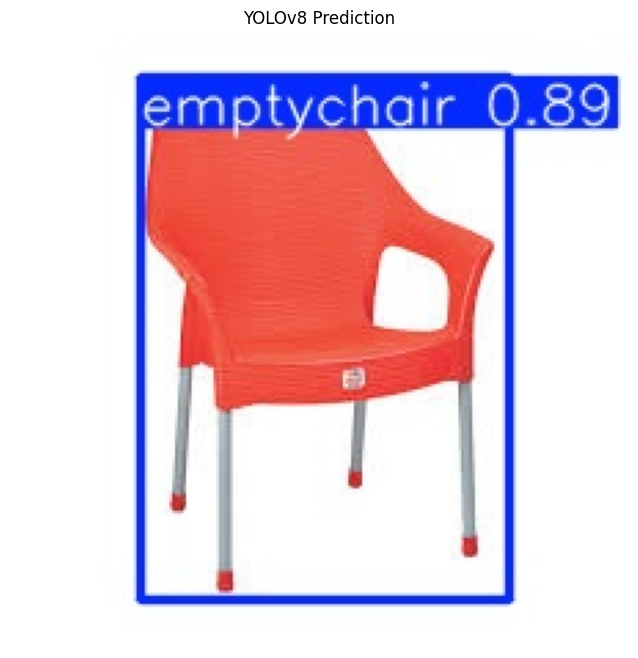

In [ ]:
# STEP 1: Install Ultralytics
!pip install ultralytics

# STEP 2: Import necessary libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

# STEP 3: Load your trained YOLO model
model = YOLO('/content/drive/MyDrive/yolo 3/yolov8l_custom_continue2/weights/best.pt')  # Update with your path

# STEP 4: Run prediction
results = model.predict(
    source='/content/drive/MyDrive/seat detetction/11.jpg',  # Update with your test image path
    conf=0.25,
    save=True
)

# STEP 5: Display the result
# Find the path of the saved image (usually at /content/runs/detect/predict/)
output_dir = results[0].save_dir
output_path = os.path.join(output_dir, os.path.basename('/content/drive/MyDrive/seat detetction/11.jpg'))

# Read and show the saved image
img = cv2.imread(output_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("YOLOv8 Prediction")
plt.show()



image 1/1 /content/drive/MyDrive/seat detetction/f555.jpg: 320x416 1 fullchair, 60.8ms
Speed: 1.3ms preprocess, 60.8ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 416)
Results saved to runs/detect/predict5


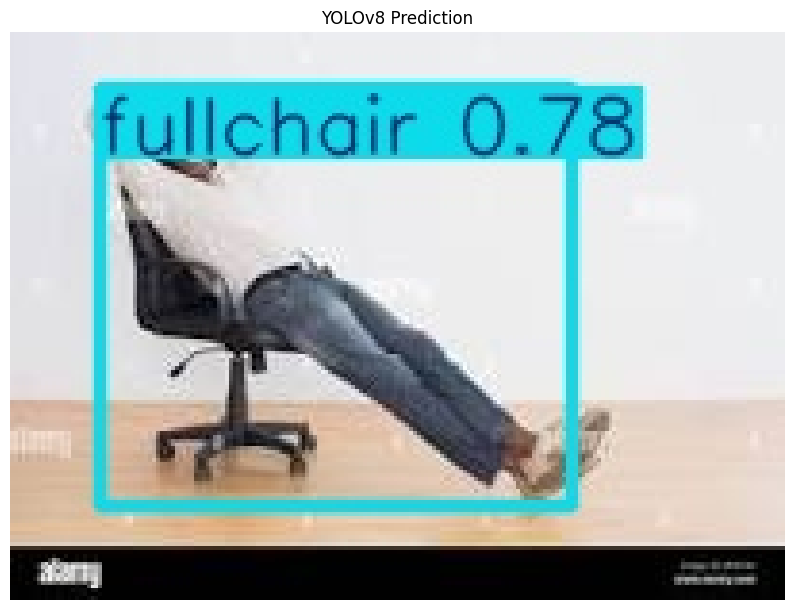

In [ ]:
# STEP 1: Install Ultralytics (if not already installed)
!pip install ultralytics

# STEP 2: Import necessary libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

# STEP 3: Load your YOLO model
model = YOLO('/content/drive/MyDrive/yolo 3/yolov8l_custom_continue2/weights/best.pt')

# STEP 4: Run prediction
results = model.predict(
    source='/content/drive/MyDrive/seat detetction/f555.jpg',
    conf=0.25,
    save=True
)

# STEP 5: Get the path to the saved result
save_dir = results[0].save_dir
input_image_name = os.path.basename('/content/drive/MyDrive/seat detetction/f555.jpg')
output_path = os.path.join(save_dir, input_image_name)

# STEP 6: Display the result image
if not os.path.exists(output_path):
    print(f"Output image not found at: {output_path}")
else:
    img = cv2.imread(output_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("YOLOv8 Prediction")
    plt.show()
